# Load Packages

In [1]:
# Primary Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Package to Save Model
import joblib

# Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Load and Clean Data

In [3]:
data = pd.read_csv('data/FINAL_NA_TALAGA.csv')

In [4]:
data.head()

,TITLE,ID,RUNTIME,IMDB_RATING,DIRECTOR,DIRECTOR_FB_LIKES,ACTOR_1,ACTOR_1_FB_LIKES,ACTOR_2,ACTOR_2_FB_LIKES,...,COUNTRIES,LANGUAGES,RELEASE_DATE,BUDGET,FILMING_LOCATION,PROD_COMPANY,DISTRIBUTOR,GENRES,OPENING,MOVIE_CERTIFICATE
0,Jumanji: The Next Level,tt7975244,123.0,7.0,Jake Kasdan,52.0,Dwayne Johnson,12000.0,Jack Black,7300000.0,...,USA,English,12/13/2019,125000000.0,"Georgia State University, Atlanta, Georgia, USA","Hartbeat Productions, Instinctual VFX, Matt To...",Sony Pictures Releasing,"Action, Adventure, Comedy, Fantasy",1420476.0,PG-13
1,Frozen II,tt4520988,103.0,7.2,Chris Buck,69.0,Kristen Bell,704000.0,Idina Menzel,NaN,...,USA,English,11/22/2019,150000000.0,"Norway, Norge","Walt Disney Animation Studios, Walt Disney Pic...",Walt Disney Studios Motion Pictures,"Animation, Adventure, Comedy",6190359.0,G
2,Avengers: Endgame,tt4154796,181.0,8.5,Anthony Russo,94.0,Robert Downey Jr.,21000.0,Chris Evans,11000.0,...,USA,"English, Japanese, Xhosa, German",4/26/2019,356000000.0,"Atlanta, Georgia, USA",Marvel Studios,Walt Disney Studios Motion Pictures,"Action, Adventure, Drama, Sci-Fi",17977175.0,PG-13
3,Captain Marvel,tt4154664,123.0,6.9,Anna Boden,16.0,Brie Larson,1600.0,Samuel L. Jackson,3700000.0,...,"USA, Australia",English,8/3/2019,175000000.0,"Los Angeles, California, USA","Walt Disney Pictures, Marvel Studios, Animal L...",Walt Disney Studios Motion Pictures,"Action, Adventure, Sci-Fi",6113889.0,PG-13
4,Spider-Man: Far from Home,tt6320628,129.0,7.6,Jon Watts,NaN,Tom Holland,55000.0,Samuel L. Jackson,3700000.0,...,USA,"English, Italian, Czech",2/7/2019,160000000.0,"Hertfordshire, England, UK","Columbia Pictures, Pascal Pictures, Marvel Stu...",Sony Pictures Releasing,"Action, Adventure, Sci-Fi",5719954.0,PG-13


In [5]:
data.shape

(1655, 26)

In [6]:
data['FLAG_TOP_GROSS'] = np.where(data['GROSS'] >= 2000000, 1, 0)

In [7]:
data[["GROSS", "FLAG_TOP_GROSS"]].head()

,GROSS,FLAG_TOP_GROSS
0,4258426,1
1,16380006,1
2,32839486,1
3,12492800,1
4,10578935,1


In [8]:
# Convert RELEASE DATE Data Type to "DATE"
data['RELEASE_DATE'] = pd.to_datetime(data['RELEASE_DATE'], errors='coerce')

In [9]:
# New Column for Release Month from Release Date
data['RELEASE_MONTH'] = pd.DatetimeIndex(data['RELEASE_DATE']).month
data.head()

,TITLE,ID,RUNTIME,IMDB_RATING,DIRECTOR,DIRECTOR_FB_LIKES,ACTOR_1,ACTOR_1_FB_LIKES,ACTOR_2,ACTOR_2_FB_LIKES,...,RELEASE_DATE,BUDGET,FILMING_LOCATION,PROD_COMPANY,DISTRIBUTOR,GENRES,OPENING,MOVIE_CERTIFICATE,FLAG_TOP_GROSS,RELEASE_MONTH
0,Jumanji: The Next Level,tt7975244,123.0,7.0,Jake Kasdan,52.0,Dwayne Johnson,12000.0,Jack Black,7300000.0,...,2019-12-13,125000000.0,"Georgia State University, Atlanta, Georgia, USA","Hartbeat Productions, Instinctual VFX, Matt To...",Sony Pictures Releasing,"Action, Adventure, Comedy, Fantasy",1420476.0,PG-13,1,12
1,Frozen II,tt4520988,103.0,7.2,Chris Buck,69.0,Kristen Bell,704000.0,Idina Menzel,NaN,...,2019-11-22,150000000.0,"Norway, Norge","Walt Disney Animation Studios, Walt Disney Pic...",Walt Disney Studios Motion Pictures,"Animation, Adventure, Comedy",6190359.0,G,1,11
2,Avengers: Endgame,tt4154796,181.0,8.5,Anthony Russo,94.0,Robert Downey Jr.,21000.0,Chris Evans,11000.0,...,2019-04-26,356000000.0,"Atlanta, Georgia, USA",Marvel Studios,Walt Disney Studios Motion Pictures,"Action, Adventure, Drama, Sci-Fi",17977175.0,PG-13,1,4
3,Captain Marvel,tt4154664,123.0,6.9,Anna Boden,16.0,Brie Larson,1600.0,Samuel L. Jackson,3700000.0,...,2019-08-03,175000000.0,"Los Angeles, California, USA","Walt Disney Pictures, Marvel Studios, Animal L...",Walt Disney Studios Motion Pictures,"Action, Adventure, Sci-Fi",6113889.0,PG-13,1,8
4,Spider-Man: Far from Home,tt6320628,129.0,7.6,Jon Watts,NaN,Tom Holland,55000.0,Samuel L. Jackson,3700000.0,...,2019-02-07,160000000.0,"Hertfordshire, England, UK","Columbia Pictures, Pascal Pictures, Marvel Stu...",Sony Pictures Releasing,"Action, Adventure, Sci-Fi",5719954.0,PG-13,1,2


In [10]:
#change numerical months into words
import calendar
data['RELEASE_MONTH'] = data['RELEASE_MONTH'].apply(lambda x: calendar.month_name[x])
data.head()

,TITLE,ID,RUNTIME,IMDB_RATING,DIRECTOR,DIRECTOR_FB_LIKES,ACTOR_1,ACTOR_1_FB_LIKES,ACTOR_2,ACTOR_2_FB_LIKES,...,RELEASE_DATE,BUDGET,FILMING_LOCATION,PROD_COMPANY,DISTRIBUTOR,GENRES,OPENING,MOVIE_CERTIFICATE,FLAG_TOP_GROSS,RELEASE_MONTH
0,Jumanji: The Next Level,tt7975244,123.0,7.0,Jake Kasdan,52.0,Dwayne Johnson,12000.0,Jack Black,7300000.0,...,2019-12-13,125000000.0,"Georgia State University, Atlanta, Georgia, USA","Hartbeat Productions, Instinctual VFX, Matt To...",Sony Pictures Releasing,"Action, Adventure, Comedy, Fantasy",1420476.0,PG-13,1,December
1,Frozen II,tt4520988,103.0,7.2,Chris Buck,69.0,Kristen Bell,704000.0,Idina Menzel,NaN,...,2019-11-22,150000000.0,"Norway, Norge","Walt Disney Animation Studios, Walt Disney Pic...",Walt Disney Studios Motion Pictures,"Animation, Adventure, Comedy",6190359.0,G,1,November
2,Avengers: Endgame,tt4154796,181.0,8.5,Anthony Russo,94.0,Robert Downey Jr.,21000.0,Chris Evans,11000.0,...,2019-04-26,356000000.0,"Atlanta, Georgia, USA",Marvel Studios,Walt Disney Studios Motion Pictures,"Action, Adventure, Drama, Sci-Fi",17977175.0,PG-13,1,April
3,Captain Marvel,tt4154664,123.0,6.9,Anna Boden,16.0,Brie Larson,1600.0,Samuel L. Jackson,3700000.0,...,2019-08-03,175000000.0,"Los Angeles, California, USA","Walt Disney Pictures, Marvel Studios, Animal L...",Walt Disney Studios Motion Pictures,"Action, Adventure, Sci-Fi",6113889.0,PG-13,1,August
4,Spider-Man: Far from Home,tt6320628,129.0,7.6,Jon Watts,NaN,Tom Holland,55000.0,Samuel L. Jackson,3700000.0,...,2019-02-07,160000000.0,"Hertfordshire, England, UK","Columbia Pictures, Pascal Pictures, Marvel Stu...",Sony Pictures Releasing,"Action, Adventure, Sci-Fi",5719954.0,PG-13,1,February


In [11]:
# Count null values
MPAA_NULL = data['MOVIE_CERTIFICATE'].isna().sum()
RUNTIME_NULL = data['RUNTIME'].isna().sum()

In [12]:
# Fill null values
data['MOVIE_CERTIFICATE'] = data['MOVIE_CERTIFICATE'].fillna('Not Rated') 
data['RUNTIME'] = data['RUNTIME'].fillna(data.RUNTIME.mean())
# Recount null values
MPAA_NULL = data['MOVIE_CERTIFICATE'].isna().sum()
RUNTIME_NULL = data['RUNTIME'].isna().sum()

In [13]:
# Split Countries and concatenate it with the data
data = pd.concat([data, data.COUNTRIES.str.split(',',expand=True)],1)
data.head()

,TITLE,ID,RUNTIME,IMDB_RATING,DIRECTOR,DIRECTOR_FB_LIKES,ACTOR_1,ACTOR_1_FB_LIKES,ACTOR_2,ACTOR_2_FB_LIKES,...,RELEASE_MONTH,0,1,2,3,4,5,6,7,8
0,Jumanji: The Next Level,tt7975244,123.0,7.0,Jake Kasdan,52.0,Dwayne Johnson,12000.0,Jack Black,7300000.0,...,December,USA,None,None,None,None,None,None,None,None
1,Frozen II,tt4520988,103.0,7.2,Chris Buck,69.0,Kristen Bell,704000.0,Idina Menzel,NaN,...,November,USA,None,None,None,None,None,None,None,None
2,Avengers: Endgame,tt4154796,181.0,8.5,Anthony Russo,94.0,Robert Downey Jr.,21000.0,Chris Evans,11000.0,...,April,USA,None,None,None,None,None,None,None,None
3,Captain Marvel,tt4154664,123.0,6.9,Anna Boden,16.0,Brie Larson,1600.0,Samuel L. Jackson,3700000.0,...,August,USA,Australia,None,None,None,None,None,None,None
4,Spider-Man: Far from Home,tt6320628,129.0,7.6,Jon Watts,NaN,Tom Holland,55000.0,Samuel L. Jackson,3700000.0,...,February,USA,None,None,None,None,None,None,None,None


In [14]:
# Rename Columns
data = data.rename(columns={0: 'COUNTRY_1', 1: 'COUNTRY_2', 2:'COUNTRY_3', 3:'COUNTRY_4', 4:'COUNTRY_5', 5:'COUNTRY_6', 6:'COUNTRY_7', 7:'COUNTRY_8', 8:'COUNTRY_9'})
data.head()

,TITLE,ID,RUNTIME,IMDB_RATING,DIRECTOR,DIRECTOR_FB_LIKES,ACTOR_1,ACTOR_1_FB_LIKES,ACTOR_2,ACTOR_2_FB_LIKES,...,RELEASE_MONTH,COUNTRY_1,COUNTRY_2,COUNTRY_3,COUNTRY_4,COUNTRY_5,COUNTRY_6,COUNTRY_7,COUNTRY_8,COUNTRY_9
0,Jumanji: The Next Level,tt7975244,123.0,7.0,Jake Kasdan,52.0,Dwayne Johnson,12000.0,Jack Black,7300000.0,...,December,USA,None,None,None,None,None,None,None,None
1,Frozen II,tt4520988,103.0,7.2,Chris Buck,69.0,Kristen Bell,704000.0,Idina Menzel,NaN,...,November,USA,None,None,None,None,None,None,None,None
2,Avengers: Endgame,tt4154796,181.0,8.5,Anthony Russo,94.0,Robert Downey Jr.,21000.0,Chris Evans,11000.0,...,April,USA,None,None,None,None,None,None,None,None
3,Captain Marvel,tt4154664,123.0,6.9,Anna Boden,16.0,Brie Larson,1600.0,Samuel L. Jackson,3700000.0,...,August,USA,Australia,None,None,None,None,None,None,None
4,Spider-Man: Far from Home,tt6320628,129.0,7.6,Jon Watts,NaN,Tom Holland,55000.0,Samuel L. Jackson,3700000.0,...,February,USA,None,None,None,None,None,None,None,None


In [15]:
# Drop other Country Columns, retain only Country_1
data = data.drop(columns = ["COUNTRY_2", "COUNTRY_3", "COUNTRY_4", "COUNTRY_5", "COUNTRY_6", "COUNTRY_7", "COUNTRY_8", "COUNTRY_9"])
data.head()

,TITLE,ID,RUNTIME,IMDB_RATING,DIRECTOR,DIRECTOR_FB_LIKES,ACTOR_1,ACTOR_1_FB_LIKES,ACTOR_2,ACTOR_2_FB_LIKES,...,BUDGET,FILMING_LOCATION,PROD_COMPANY,DISTRIBUTOR,GENRES,OPENING,MOVIE_CERTIFICATE,FLAG_TOP_GROSS,RELEASE_MONTH,COUNTRY_1
0,Jumanji: The Next Level,tt7975244,123.0,7.0,Jake Kasdan,52.0,Dwayne Johnson,12000.0,Jack Black,7300000.0,...,125000000.0,"Georgia State University, Atlanta, Georgia, USA","Hartbeat Productions, Instinctual VFX, Matt To...",Sony Pictures Releasing,"Action, Adventure, Comedy, Fantasy",1420476.0,PG-13,1,December,USA
1,Frozen II,tt4520988,103.0,7.2,Chris Buck,69.0,Kristen Bell,704000.0,Idina Menzel,NaN,...,150000000.0,"Norway, Norge","Walt Disney Animation Studios, Walt Disney Pic...",Walt Disney Studios Motion Pictures,"Animation, Adventure, Comedy",6190359.0,G,1,November,USA
2,Avengers: Endgame,tt4154796,181.0,8.5,Anthony Russo,94.0,Robert Downey Jr.,21000.0,Chris Evans,11000.0,...,356000000.0,"Atlanta, Georgia, USA",Marvel Studios,Walt Disney Studios Motion Pictures,"Action, Adventure, Drama, Sci-Fi",17977175.0,PG-13,1,April,USA
3,Captain Marvel,tt4154664,123.0,6.9,Anna Boden,16.0,Brie Larson,1600.0,Samuel L. Jackson,3700000.0,...,175000000.0,"Los Angeles, California, USA","Walt Disney Pictures, Marvel Studios, Animal L...",Walt Disney Studios Motion Pictures,"Action, Adventure, Sci-Fi",6113889.0,PG-13,1,August,USA
4,Spider-Man: Far from Home,tt6320628,129.0,7.6,Jon Watts,NaN,Tom Holland,55000.0,Samuel L. Jackson,3700000.0,...,160000000.0,"Hertfordshire, England, UK","Columbia Pictures, Pascal Pictures, Marvel Stu...",Sony Pictures Releasing,"Action, Adventure, Sci-Fi",5719954.0,PG-13,1,February,USA


In [16]:
data['COUNTRY_1'].isna().sum()

157

In [17]:
# Most Frequent Country
data.groupby('COUNTRY_1')['COUNTRY_1'].count().sort_values()

COUNTRY_1
Argentina                 1
Sweden                    1
Netherlands               1
Mexico                    1
Malta                     1
Malaysia                  1
United Arab Emirates      1
India                     1
Iceland                   1
Vietnam                   1
Belgium                   1
Hungary                   2
Switzerland               2
Indonesia                 2
Ireland                   2
Czech Republic            2
Italy                     3
Finland                   3
Russia                    3
South Africa              5
Thailand                  6
New Zealand               6
Australia                 9
South Korea              11
Spain                    11
Hong Kong                12
China                    17
Germany                  19
Japan                    21
France                   28
Canada                   31
UK                      100
Philippines             231
USA                     961
Name: COUNTRY_1, dtype: int64

In [18]:
# Fill Null Countries with USA (Country with majority count)
data['COUNTRY_1'] = data['COUNTRY_1'].fillna('USA')
data['COUNTRY_1'].isna().sum()

0

In [19]:
# Split Languages and concatenate it with the data
data = pd.concat([data, data.LANGUAGES.str.split(',',expand=True)], 1)
data.head()

,TITLE,ID,RUNTIME,IMDB_RATING,DIRECTOR,DIRECTOR_FB_LIKES,ACTOR_1,ACTOR_1_FB_LIKES,ACTOR_2,ACTOR_2_FB_LIKES,...,0,1,2,3,4,5,6,7,8,9
0,Jumanji: The Next Level,tt7975244,123.0,7.0,Jake Kasdan,52.0,Dwayne Johnson,12000.0,Jack Black,7300000.0,...,English,None,None,None,None,None,None,None,None,None
1,Frozen II,tt4520988,103.0,7.2,Chris Buck,69.0,Kristen Bell,704000.0,Idina Menzel,NaN,...,English,None,None,None,None,None,None,None,None,None
2,Avengers: Endgame,tt4154796,181.0,8.5,Anthony Russo,94.0,Robert Downey Jr.,21000.0,Chris Evans,11000.0,...,English,Japanese,Xhosa,German,None,None,None,None,None,None
3,Captain Marvel,tt4154664,123.0,6.9,Anna Boden,16.0,Brie Larson,1600.0,Samuel L. Jackson,3700000.0,...,English,None,None,None,None,None,None,None,None,None
4,Spider-Man: Far from Home,tt6320628,129.0,7.6,Jon Watts,NaN,Tom Holland,55000.0,Samuel L. Jackson,3700000.0,...,English,Italian,Czech,None,None,None,None,None,None,None


In [20]:
# Rename Columns
data = data.rename(columns={0: 'LANGUAGE_1', 1: 'LANGUAGE_2', 2:'LANGUAGE_3', 3:'LANGUAGE_4', 4:'LANGUAGE_5', 5:'LANGUAGE_6', 6:'LANGUAGE_7', 7:'LANGUAGE_8', 8:'LANGUAGE_9', 9:'LANGUAGE_10'})
data.head()

,TITLE,ID,RUNTIME,IMDB_RATING,DIRECTOR,DIRECTOR_FB_LIKES,ACTOR_1,ACTOR_1_FB_LIKES,ACTOR_2,ACTOR_2_FB_LIKES,...,LANGUAGE_1,LANGUAGE_2,LANGUAGE_3,LANGUAGE_4,LANGUAGE_5,LANGUAGE_6,LANGUAGE_7,LANGUAGE_8,LANGUAGE_9,LANGUAGE_10
0,Jumanji: The Next Level,tt7975244,123.0,7.0,Jake Kasdan,52.0,Dwayne Johnson,12000.0,Jack Black,7300000.0,...,English,None,None,None,None,None,None,None,None,None
1,Frozen II,tt4520988,103.0,7.2,Chris Buck,69.0,Kristen Bell,704000.0,Idina Menzel,NaN,...,English,None,None,None,None,None,None,None,None,None
2,Avengers: Endgame,tt4154796,181.0,8.5,Anthony Russo,94.0,Robert Downey Jr.,21000.0,Chris Evans,11000.0,...,English,Japanese,Xhosa,German,None,None,None,None,None,None
3,Captain Marvel,tt4154664,123.0,6.9,Anna Boden,16.0,Brie Larson,1600.0,Samuel L. Jackson,3700000.0,...,English,None,None,None,None,None,None,None,None,None
4,Spider-Man: Far from Home,tt6320628,129.0,7.6,Jon Watts,NaN,Tom Holland,55000.0,Samuel L. Jackson,3700000.0,...,English,Italian,Czech,None,None,None,None,None,None,None


In [21]:
# Drop other Language Columns, retain only Language_1
data = data.drop(columns = ["LANGUAGE_2", "LANGUAGE_3", "LANGUAGE_4", "LANGUAGE_5", "LANGUAGE_6", "LANGUAGE_7", "LANGUAGE_8", "LANGUAGE_9", "LANGUAGE_10"])
data.head()

,TITLE,ID,RUNTIME,IMDB_RATING,DIRECTOR,DIRECTOR_FB_LIKES,ACTOR_1,ACTOR_1_FB_LIKES,ACTOR_2,ACTOR_2_FB_LIKES,...,FILMING_LOCATION,PROD_COMPANY,DISTRIBUTOR,GENRES,OPENING,MOVIE_CERTIFICATE,FLAG_TOP_GROSS,RELEASE_MONTH,COUNTRY_1,LANGUAGE_1
0,Jumanji: The Next Level,tt7975244,123.0,7.0,Jake Kasdan,52.0,Dwayne Johnson,12000.0,Jack Black,7300000.0,...,"Georgia State University, Atlanta, Georgia, USA","Hartbeat Productions, Instinctual VFX, Matt To...",Sony Pictures Releasing,"Action, Adventure, Comedy, Fantasy",1420476.0,PG-13,1,December,USA,English
1,Frozen II,tt4520988,103.0,7.2,Chris Buck,69.0,Kristen Bell,704000.0,Idina Menzel,NaN,...,"Norway, Norge","Walt Disney Animation Studios, Walt Disney Pic...",Walt Disney Studios Motion Pictures,"Animation, Adventure, Comedy",6190359.0,G,1,November,USA,English
2,Avengers: Endgame,tt4154796,181.0,8.5,Anthony Russo,94.0,Robert Downey Jr.,21000.0,Chris Evans,11000.0,...,"Atlanta, Georgia, USA",Marvel Studios,Walt Disney Studios Motion Pictures,"Action, Adventure, Drama, Sci-Fi",17977175.0,PG-13,1,April,USA,English
3,Captain Marvel,tt4154664,123.0,6.9,Anna Boden,16.0,Brie Larson,1600.0,Samuel L. Jackson,3700000.0,...,"Los Angeles, California, USA","Walt Disney Pictures, Marvel Studios, Animal L...",Walt Disney Studios Motion Pictures,"Action, Adventure, Sci-Fi",6113889.0,PG-13,1,August,USA,English
4,Spider-Man: Far from Home,tt6320628,129.0,7.6,Jon Watts,NaN,Tom Holland,55000.0,Samuel L. Jackson,3700000.0,...,"Hertfordshire, England, UK","Columbia Pictures, Pascal Pictures, Marvel Stu...",Sony Pictures Releasing,"Action, Adventure, Sci-Fi",5719954.0,PG-13,1,February,USA,English


In [22]:
# Count Language with Null Values
data['LANGUAGE_1'].isna().sum()

0

# Feature Engineering

## Dummy Variables

In [23]:
# Set Variables
categorical = ['MOVIE_CERTIFICATE', 'COUNTRY_1', 'LANGUAGE_1', 'RELEASE_MONTH']

# DUMMY VARIABLES: MULTIHOT ENCODING
data_dummies = pd.get_dummies(data[categorical].astype(str))
data_dummies

,MOVIE_CERTIFICATE_G,MOVIE_CERTIFICATE_Not Rated,MOVIE_CERTIFICATE_PG,MOVIE_CERTIFICATE_PG-13,MOVIE_CERTIFICATE_R,MOVIE_CERTIFICATE_R-13,MOVIE_CERTIFICATE_R-16,MOVIE_CERTIFICATE_R-18,COUNTRY_1_Argentina,COUNTRY_1_Australia,...,RELEASE_MONTH_December,RELEASE_MONTH_February,RELEASE_MONTH_January,RELEASE_MONTH_July,RELEASE_MONTH_June,RELEASE_MONTH_March,RELEASE_MONTH_May,RELEASE_MONTH_November,RELEASE_MONTH_October,RELEASE_MONTH_September
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1650,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1651,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1652,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1653,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
# Concatenate Dummies with Data
data = pd.concat([data, data_dummies], axis=1, sort=False)
data.head()

,TITLE,ID,RUNTIME,IMDB_RATING,DIRECTOR,DIRECTOR_FB_LIKES,ACTOR_1,ACTOR_1_FB_LIKES,ACTOR_2,ACTOR_2_FB_LIKES,...,RELEASE_MONTH_December,RELEASE_MONTH_February,RELEASE_MONTH_January,RELEASE_MONTH_July,RELEASE_MONTH_June,RELEASE_MONTH_March,RELEASE_MONTH_May,RELEASE_MONTH_November,RELEASE_MONTH_October,RELEASE_MONTH_September
0,Jumanji: The Next Level,tt7975244,123.0,7.0,Jake Kasdan,52.0,Dwayne Johnson,12000.0,Jack Black,7300000.0,...,1,0,0,0,0,0,0,0,0,0
1,Frozen II,tt4520988,103.0,7.2,Chris Buck,69.0,Kristen Bell,704000.0,Idina Menzel,NaN,...,0,0,0,0,0,0,0,1,0,0
2,Avengers: Endgame,tt4154796,181.0,8.5,Anthony Russo,94.0,Robert Downey Jr.,21000.0,Chris Evans,11000.0,...,0,0,0,0,0,0,0,0,0,0
3,Captain Marvel,tt4154664,123.0,6.9,Anna Boden,16.0,Brie Larson,1600.0,Samuel L. Jackson,3700000.0,...,0,0,0,0,0,0,0,0,0,0
4,Spider-Man: Far from Home,tt6320628,129.0,7.6,Jon Watts,NaN,Tom Holland,55000.0,Samuel L. Jackson,3700000.0,...,0,1,0,0,0,0,0,0,0,0


# Topic Modeling for STORYLINE

In [25]:
# !pip install gensim
# !pip install pyLDAvis
import nltk
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

import gensim
from gensim import corpora
from gensim.models import CoherenceModel

# Plotting tools

import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\shiena
[nltk_data]     sangalang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\shiena
[nltk_data]     sangalang\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

## Cleaning and Preprocessing

Remove the punctuations, stopwords and normalize the corpus.

In [27]:
data['clean_doc'] = data['STORYLINE'].astype(str).apply(lambda x: clean(x).split())

In [28]:
data.head()

,TITLE,ID,RUNTIME,IMDB_RATING,DIRECTOR,DIRECTOR_FB_LIKES,ACTOR_1,ACTOR_1_FB_LIKES,ACTOR_2,ACTOR_2_FB_LIKES,...,RELEASE_MONTH_February,RELEASE_MONTH_January,RELEASE_MONTH_July,RELEASE_MONTH_June,RELEASE_MONTH_March,RELEASE_MONTH_May,RELEASE_MONTH_November,RELEASE_MONTH_October,RELEASE_MONTH_September,clean_doc
0,Jumanji: The Next Level,tt7975244,123.0,7.0,Jake Kasdan,52.0,Dwayne Johnson,12000.0,Jack Black,7300000.0,...,0,0,0,0,0,0,0,0,0,"[gang, back, game, changed, return, jumanji, r..."
1,Frozen II,tt4520988,103.0,7.2,Chris Buck,69.0,Kristen Bell,704000.0,Idina Menzel,NaN,...,0,0,0,0,0,0,1,0,0,"[harnessed, evergrowing, power, lifting, dread..."
2,Avengers: Endgame,tt4154796,181.0,8.5,Anthony Russo,94.0,Robert Downey Jr.,21000.0,Chris Evans,11000.0,...,0,0,0,0,0,0,0,0,0,"[devastating, event, avenger, infinity, war, 2..."
3,Captain Marvel,tt4154664,123.0,6.9,Anna Boden,16.0,Brie Larson,1600.0,Samuel L. Jackson,3700000.0,...,0,0,0,0,0,0,0,0,0,"[crashing, experimental, aircraft, air, force,..."
4,Spider-Man: Far from Home,tt6320628,129.0,7.6,Jon Watts,NaN,Tom Holland,55000.0,Samuel L. Jackson,3700000.0,...,1,0,0,0,0,0,0,0,0,"[friendly, neighborhood, super, hero, decides,..."


## Preparing Document-Term Matrix

In [29]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(data['clean_doc'])

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data['clean_doc']]
# doc_term_matrix

In [30]:
# save dictionary
dictionary.save('models/dictionary.sav')

In [31]:
# Load saved dictionary
dictionary = corpora.Dictionary.load('models/dictionary.sav')
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data['clean_doc']]

In [32]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50, random_state=42)

In [33]:
# save lda model
ldamodel.save("models/lda_model.sav")

In [34]:
# load model
lda_load_model = gensim.models.ldamodel.LdaModel.load("models/lda_model.sav")

print(lda_load_model.print_topics(num_topics=3, num_words=2))

[(0, '0.005*"find" + 0.005*"life"'), (1, '0.008*"find" + 0.006*"one"'), (2, '0.006*"life" + 0.005*"one"')]


In [35]:
# List out document topics
lists = ldamodel.get_document_topics(doc_term_matrix, minimum_probability=0.0)

In [36]:
# Convert to dataframe
document_topic_dist = pd.DataFrame([i for i in lists]).apply(lambda x: [i[1] for i in x])

In [37]:
document_topic_dist.head()

,0,1,2
0,0.014642,0.014299,0.971059
1,0.004876,0.469936,0.525188
2,0.628904,0.011860,0.359236
3,0.980708,0.009442,0.009851
4,0.980489,0.009477,0.010034


In [38]:
data = pd.concat([data, document_topic_dist], axis=1, sort=False)
data = data.rename(columns={0: 'TOPIC_1', 1: 'TOPIC_2', 2:'TOPIC_3'})
data.head()

,TITLE,ID,RUNTIME,IMDB_RATING,DIRECTOR,DIRECTOR_FB_LIKES,ACTOR_1,ACTOR_1_FB_LIKES,ACTOR_2,ACTOR_2_FB_LIKES,...,RELEASE_MONTH_June,RELEASE_MONTH_March,RELEASE_MONTH_May,RELEASE_MONTH_November,RELEASE_MONTH_October,RELEASE_MONTH_September,clean_doc,TOPIC_1,TOPIC_2,TOPIC_3
0,Jumanji: The Next Level,tt7975244,123.0,7.0,Jake Kasdan,52.0,Dwayne Johnson,12000.0,Jack Black,7300000.0,...,0,0,0,0,0,0,"[gang, back, game, changed, return, jumanji, r...",0.014642,0.014299,0.971059
1,Frozen II,tt4520988,103.0,7.2,Chris Buck,69.0,Kristen Bell,704000.0,Idina Menzel,NaN,...,0,0,0,1,0,0,"[harnessed, evergrowing, power, lifting, dread...",0.004876,0.469936,0.525188
2,Avengers: Endgame,tt4154796,181.0,8.5,Anthony Russo,94.0,Robert Downey Jr.,21000.0,Chris Evans,11000.0,...,0,0,0,0,0,0,"[devastating, event, avenger, infinity, war, 2...",0.628904,0.011860,0.359236
3,Captain Marvel,tt4154664,123.0,6.9,Anna Boden,16.0,Brie Larson,1600.0,Samuel L. Jackson,3700000.0,...,0,0,0,0,0,0,"[crashing, experimental, aircraft, air, force,...",0.980708,0.009442,0.009851
4,Spider-Man: Far from Home,tt6320628,129.0,7.6,Jon Watts,NaN,Tom Holland,55000.0,Samuel L. Jackson,3700000.0,...,0,0,0,0,0,0,"[friendly, neighborhood, super, hero, decides,...",0.980489,0.009477,0.010034


# Topic Modeling for Genres

In [39]:
stop1 = set(stopwords.words('english'))
exclude1 = set(string.punctuation) 
lemma1 = WordNetLemmatizer()
def clean(doc1):
    stop_free1 = " ".join([i1 for i1 in doc1.lower().split() if i1 not in stop1])
    punc_free1 = ''.join(ch1 for ch1 in stop_free1 if ch1 not in exclude1)
    normalized1 = " ".join(lemma1.lemmatize(word1) for word1 in punc_free1.split())
    return normalized1

In [40]:
data['clean_doc_1'] = data['GENRES'].astype(str).apply(lambda x1: clean(x1).split())

In [41]:
data.head()

,TITLE,ID,RUNTIME,IMDB_RATING,DIRECTOR,DIRECTOR_FB_LIKES,ACTOR_1,ACTOR_1_FB_LIKES,ACTOR_2,ACTOR_2_FB_LIKES,...,RELEASE_MONTH_March,RELEASE_MONTH_May,RELEASE_MONTH_November,RELEASE_MONTH_October,RELEASE_MONTH_September,clean_doc,TOPIC_1,TOPIC_2,TOPIC_3,clean_doc_1
0,Jumanji: The Next Level,tt7975244,123.0,7.0,Jake Kasdan,52.0,Dwayne Johnson,12000.0,Jack Black,7300000.0,...,0,0,0,0,0,"[gang, back, game, changed, return, jumanji, r...",0.014642,0.014299,0.971059,"[action, adventure, comedy, fantasy]"
1,Frozen II,tt4520988,103.0,7.2,Chris Buck,69.0,Kristen Bell,704000.0,Idina Menzel,NaN,...,0,0,1,0,0,"[harnessed, evergrowing, power, lifting, dread...",0.004876,0.469936,0.525188,"[animation, adventure, comedy]"
2,Avengers: Endgame,tt4154796,181.0,8.5,Anthony Russo,94.0,Robert Downey Jr.,21000.0,Chris Evans,11000.0,...,0,0,0,0,0,"[devastating, event, avenger, infinity, war, 2...",0.628904,0.011860,0.359236,"[action, adventure, drama, scifi]"
3,Captain Marvel,tt4154664,123.0,6.9,Anna Boden,16.0,Brie Larson,1600.0,Samuel L. Jackson,3700000.0,...,0,0,0,0,0,"[crashing, experimental, aircraft, air, force,...",0.980708,0.009442,0.009851,"[action, adventure, scifi]"
4,Spider-Man: Far from Home,tt6320628,129.0,7.6,Jon Watts,NaN,Tom Holland,55000.0,Samuel L. Jackson,3700000.0,...,0,0,0,0,0,"[friendly, neighborhood, super, hero, decides,...",0.980489,0.009477,0.010034,"[action, adventure, scifi]"


In [42]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary1 = corpora.Dictionary(data['clean_doc_1'])

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix1 = [dictionary1.doc2bow(doc1) for doc1 in data['clean_doc_1']]
# doc_term_matrix

In [43]:
# save dictionary
dictionary1.save('models/dictionary1.sav')

In [44]:
# Load saved dictionary
dictionary1 = corpora.Dictionary.load('models/dictionary1.sav')
doc_term_matrix1 = [dictionary1.doc2bow(doc1) for doc1 in data['clean_doc_1']]

In [45]:
# Creating the object for LDA model using gensim library
Lda1 = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel1 = Lda1(doc_term_matrix1, num_topics=3, id2word = dictionary1, passes=50, random_state=42)

In [46]:
# save lda model
ldamodel1.save("models/lda_model1.sav")

In [47]:
# load model
lda_load_model1 = gensim.models.ldamodel.LdaModel.load("models/lda_model1.sav")

print(lda_load_model1.print_topics(num_topics=3, num_words=2))

[(0, '0.243*"action" + 0.235*"thriller"'), (1, '0.244*"comedy" + 0.215*"fantasy"'), (2, '0.346*"drama" + 0.218*"romance"')]


In [48]:
# List out document topics
lists1 = ldamodel1.get_document_topics(doc_term_matrix1, minimum_probability=0.0)

In [49]:
# Convert to dataframe
document_topic_dist1 = pd.DataFrame([i1 for i1 in lists]).apply(lambda x1: [i1[1] for i1 in x1])

In [50]:
document_topic_dist1.head()

,0,1,2
0,0.014643,0.014300,0.971057
1,0.004877,0.469936,0.525187
2,0.628897,0.011860,0.359244
3,0.980716,0.009441,0.009843
4,0.980477,0.009477,0.010046


In [51]:
data = pd.concat([data, document_topic_dist1], axis=1, sort=False)
data = data.rename(columns={0: 'GENRE_1', 1: 'GENRE_2', 2:'GENRE_3'})
data.head()

,TITLE,ID,RUNTIME,IMDB_RATING,DIRECTOR,DIRECTOR_FB_LIKES,ACTOR_1,ACTOR_1_FB_LIKES,ACTOR_2,ACTOR_2_FB_LIKES,...,RELEASE_MONTH_October,RELEASE_MONTH_September,clean_doc,TOPIC_1,TOPIC_2,TOPIC_3,clean_doc_1,GENRE_1,GENRE_2,GENRE_3
0,Jumanji: The Next Level,tt7975244,123.0,7.0,Jake Kasdan,52.0,Dwayne Johnson,12000.0,Jack Black,7300000.0,...,0,0,"[gang, back, game, changed, return, jumanji, r...",0.014642,0.014299,0.971059,"[action, adventure, comedy, fantasy]",0.014643,0.014300,0.971057
1,Frozen II,tt4520988,103.0,7.2,Chris Buck,69.0,Kristen Bell,704000.0,Idina Menzel,NaN,...,0,0,"[harnessed, evergrowing, power, lifting, dread...",0.004876,0.469936,0.525188,"[animation, adventure, comedy]",0.004877,0.469936,0.525187
2,Avengers: Endgame,tt4154796,181.0,8.5,Anthony Russo,94.0,Robert Downey Jr.,21000.0,Chris Evans,11000.0,...,0,0,"[devastating, event, avenger, infinity, war, 2...",0.628904,0.011860,0.359236,"[action, adventure, drama, scifi]",0.628897,0.011860,0.359244
3,Captain Marvel,tt4154664,123.0,6.9,Anna Boden,16.0,Brie Larson,1600.0,Samuel L. Jackson,3700000.0,...,0,0,"[crashing, experimental, aircraft, air, force,...",0.980708,0.009442,0.009851,"[action, adventure, scifi]",0.980716,0.009441,0.009843
4,Spider-Man: Far from Home,tt6320628,129.0,7.6,Jon Watts,NaN,Tom Holland,55000.0,Samuel L. Jackson,3700000.0,...,0,0,"[friendly, neighborhood, super, hero, decides,...",0.980489,0.009477,0.010034,"[action, adventure, scifi]",0.980477,0.009477,0.010046


# Feature Selection and Train-Test Split

In [52]:
list(data.columns)

['TITLE',
 'ID',
 'RUNTIME',
 'IMDB_RATING',
 'DIRECTOR',
 'DIRECTOR_FB_LIKES',
 'ACTOR_1',
 'ACTOR_1_FB_LIKES',
 'ACTOR_2',
 'ACTOR_2_FB_LIKES',
 'ACTOR_3',
 'ACTOR_3_FB_LIKES',
 'POPULARITY',
 'METASCORE',
 'STORYLINE',
 'GROSS',
 'COUNTRIES',
 'LANGUAGES',
 'RELEASE_DATE',
 'BUDGET',
 'FILMING_LOCATION',
 'PROD_COMPANY',
 'DISTRIBUTOR',
 'GENRES',
 'OPENING',
 'MOVIE_CERTIFICATE',
 'FLAG_TOP_GROSS',
 'RELEASE_MONTH',
 'COUNTRY_1',
 'LANGUAGE_1',
 'MOVIE_CERTIFICATE_G',
 'MOVIE_CERTIFICATE_Not Rated',
 'MOVIE_CERTIFICATE_PG',
 'MOVIE_CERTIFICATE_PG-13',
 'MOVIE_CERTIFICATE_R',
 'MOVIE_CERTIFICATE_R-13',
 'MOVIE_CERTIFICATE_R-16',
 'MOVIE_CERTIFICATE_R-18',
 'COUNTRY_1_Argentina',
 'COUNTRY_1_Australia',
 'COUNTRY_1_Belgium',
 'COUNTRY_1_Canada',
 'COUNTRY_1_China',
 'COUNTRY_1_Czech Republic',
 'COUNTRY_1_Finland',
 'COUNTRY_1_France',
 'COUNTRY_1_Germany',
 'COUNTRY_1_Hong Kong',
 'COUNTRY_1_Hungary',
 'COUNTRY_1_Iceland',
 'COUNTRY_1_India',
 'COUNTRY_1_Indonesia',
 'COUNTRY_1_Irel

In [57]:
# Set Variables
dependent = data['FLAG_TOP_GROSS']
numeric = ['RUNTIME', 'GENRE_1', 'GENRE_2', 'GENRE_3', 'TOPIC_1', 'TOPIC_2', 'TOPIC_3', 'MOVIE_CERTIFICATE_G', 'MOVIE_CERTIFICATE_Not Rated', 'MOVIE_CERTIFICATE_PG', 'MOVIE_CERTIFICATE_PG-13', 'MOVIE_CERTIFICATE_R', 'MOVIE_CERTIFICATE_R-13', 'MOVIE_CERTIFICATE_R-16', 'MOVIE_CERTIFICATE_R-18',
           'COUNTRY_1_Argentina', 'COUNTRY_1_Australia', 'COUNTRY_1_Belgium', 'COUNTRY_1_Canada', 'COUNTRY_1_China', 'COUNTRY_1_Czech Republic', 'COUNTRY_1_Finland', 'COUNTRY_1_France', 'COUNTRY_1_Germany', 'COUNTRY_1_Hong Kong', 'COUNTRY_1_Hungary', 'COUNTRY_1_Iceland', 'COUNTRY_1_India', 'COUNTRY_1_Indonesia', 'COUNTRY_1_Ireland',
           'COUNTRY_1_Italy', 'COUNTRY_1_Japan', 'COUNTRY_1_Malaysia', 'COUNTRY_1_Malta', 'COUNTRY_1_Mexico', 'COUNTRY_1_Netherlands', 'COUNTRY_1_New Zealand', 'COUNTRY_1_Philippines', 'COUNTRY_1_Russia', 'COUNTRY_1_South Africa', 'COUNTRY_1_South Korea', 'COUNTRY_1_Spain', 'COUNTRY_1_Sweden', 'COUNTRY_1_Switzerland',
           'COUNTRY_1_Thailand', 'COUNTRY_1_UK', 'COUNTRY_1_USA', 'COUNTRY_1_United Arab Emirates', 'COUNTRY_1_Vietnam', 'LANGUAGE_1_Cantonese', 'LANGUAGE_1_English', 'LANGUAGE_1_Filipino', 'LANGUAGE_1_French', 'LANGUAGE_1_German', 'LANGUAGE_1_Indonesian', 'LANGUAGE_1_Japanese', 'LANGUAGE_1_Korean', 'LANGUAGE_1_Malay',
           'LANGUAGE_1_Mandarin', 'LANGUAGE_1_Russian', 'LANGUAGE_1_Spanish', 'LANGUAGE_1_Tagalog', 'LANGUAGE_1_Thai', 'LANGUAGE_1_Vietnamese', 'RELEASE_MONTH_April', 'RELEASE_MONTH_August', 'RELEASE_MONTH_December', 'RELEASE_MONTH_February', 'RELEASE_MONTH_January', 'RELEASE_MONTH_July', 'RELEASE_MONTH_June',
           'RELEASE_MONTH_March', 'RELEASE_MONTH_May', 'RELEASE_MONTH_November', 'RELEASE_MONTH_October', 'RELEASE_MONTH_September']
counts = data[numeric]

In [58]:
# Define Features: Concatenate the features set above
Features = counts

# Features.head()
# Set X and y
X = Features
y = dependent

In [59]:
X.shape, y.shape

((1655, 76), (1655,))

In [60]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Check Data for FLAG_TOP_GROSS

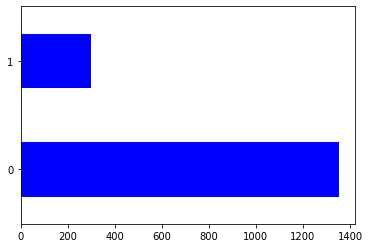

In [61]:
# DISTRIBUTION OF FLAG_TOP_GROSS
data.FLAG_TOP_GROSS.value_counts().plot(kind="barh", color="blue")

Here we can see that our data is imbalanced. So, we have to find a way to deal with it.

# Dealing with Imbalanced Data

## Generate Synthetic Samples (SMOTE)

In [62]:
# !pip install imbalanced_learn as imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_res, y_res = sm.fit_resample (X, y)

In [63]:
from collections import Counter
print(Counter(y).keys())
print(Counter(y).values())

dict_keys([1, 0])
dict_values([300, 1355])


In [64]:
from collections import Counter
print(Counter(y_res).keys())
print(Counter(y_res).values())

dict_keys([1, 0])
dict_values([1355, 1355])


In [65]:
# Train-test split
s_X_train, s_X_test, s_y_train, s_y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

In [66]:
s_X_train.shape, s_y_train.shape

((2168, 76), (2168,))

# Random Forest

In [67]:
# initialize model
model = RandomForestClassifier()

# fit model
model.fit(s_X_train, s_y_train)

# predictions
y_pred = model.predict(s_X_test)
y_pred

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,

In [68]:
# Get Test Predictions
y_pred = model.predict(s_X_test)

# Get Metrics
report = classification_report(y_pred, s_y_test)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       280
           1       0.90      0.89      0.89       262

    accuracy                           0.90       542
   macro avg       0.90      0.90      0.90       542
weighted avg       0.90      0.90      0.90       542



# Save Model

In [69]:
# Save Model
joblib.dump(model, 'models/rf_model.pkl')

['models/rf_model.pkl']

# Generate Predictions Using Sample Inputs and Saved Model

In [70]:
data['RUNTIME'].head()

0    123.0
1    103.0
2    181.0
3    123.0
4    129.0
Name: RUNTIME, dtype: float64

In [71]:
data['RELEASE_MONTH'].head()

0    December
1    November
2       April
3      August
4    February
Name: RELEASE_MONTH, dtype: object

In [80]:
RELEASE_MONTH_VALUES = pd.Series(data['RELEASE_MONTH'].unique()).str.strip()
RELEASE_MONTH_DUMMIES = pd.get_dummies(RELEASE_MONTH_VALUES)
RELEASE_MONTH_DUMMIES

,April,August,December,February,January,July,June,March,May,November,October,September
0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,0,0


In [81]:
MOVIE_CERTIFICATE_VALUES = pd.Series(data['MOVIE_CERTIFICATE'].unique()).str.strip()
MOVIE_CERTIFICATE_DUMMIES = pd.get_dummies(MOVIE_CERTIFICATE_VALUES)
MOVIE_CERTIFICATE_DUMMIES

,G,Not Rated,PG,PG-13,R,R-13,R-16,R-18
0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1
5,0,1,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0
7,0,0,0,0,1,0,0,0


In [82]:
COUNTRY_VALUES = pd.Series(data['COUNTRY_1'].unique()).str.strip()
COUNTRY_DUMMIES = pd.get_dummies(COUNTRY_VALUES)
COUNTRY_DUMMIES

,Argentina,Australia,Belgium,Canada,China,Czech Republic,Finland,France,Germany,Hong Kong,...,South Africa,South Korea,Spain,Sweden,Switzerland,Thailand,UK,USA,United Arab Emirates,Vietnam
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
LANGUAGE_VALUES = pd.Series(data['LANGUAGE_1'].unique()).str.strip()
LANGUAGE_DUMMIES = pd.get_dummies(LANGUAGE_VALUES)
LANGUAGE_DUMMIES

,Cantonese,English,Filipino,French,German,Indonesian,Japanese,Korean,Malay,Mandarin,Russian,Spanish,Tagalog,Thai,Vietnamese
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


# Load Model

In [84]:
model = joblib.load('models/rf_model.pkl')

In [85]:
# Runtime
RUNTIME = 150

# Release Month
RELEASE_MONTH_SAMPLE = 'May'
RELEASE_MONTH_SAMPLE_DUMMIES = (RELEASE_MONTH_DUMMIES.loc[np.where(RELEASE_MONTH_VALUES.values == RELEASE_MONTH_SAMPLE)[0]]
                                  .values.tolist()[0])

# Country
COUNTRY_SAMPLE = 'Philippines'
COUNTRY_SAMPLE_DUMMIES = (COUNTRY_DUMMIES.loc[np.where(COUNTRY_VALUES.values == COUNTRY_SAMPLE)[0]]
                                  .values.tolist()[0])

# language
LANGUAGE_SAMPLE = 'Filipino'
LANGUAGE_SAMPLE_DUMMIES = (LANGUAGE_DUMMIES.loc[np.where(LANGUAGE_VALUES.values == LANGUAGE_SAMPLE)[0]]
                                  .values.tolist()[0])

# Movie Certificate
MOVIE_CERTIFICATE_SAMPLE = 'PG-13'
MOVIE_CERTIFICATE_SAMPLE_DUMMIES = (MOVIE_CERTIFICATE_DUMMIES.loc[np.where(MOVIE_CERTIFICATE_VALUES.values == MOVIE_CERTIFICATE_SAMPLE)[0]]
                                  .values.tolist()[0])

# Storyline
PLOT = 'They live happily ever after'

# Genre
GENRE = 'Romance'

In [86]:
# Function to Clean PLOT
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [87]:
# Actually clean PLOT
text_process = clean(PLOT).split()
text_process1 = clean(GENRE).split()

In [88]:
# Load dictionary 
loaded_dictionary = corpora.Dictionary.load('models/dictionary.sav') 
loaded_dictionary1 = corpora.Dictionary.load('models/dictionary1.sav') 

# Convert list of words to document term array
doc_term = loaded_dictionary.doc2bow(text_process)
doc_term1 = loaded_dictionary1.doc2bow(text_process1)

In [89]:
# Load LDA model
lda_load_model = gensim.models.ldamodel.LdaModel.load("models/lda_model.sav")
lda_load_model1 = gensim.models.ldamodel.LdaModel.load("models/lda_model1.sav")

# Get document topic probabilities
lists = lda_load_model.get_document_topics(doc_term, minimum_probability=0.0)
lists1 = lda_load_model1.get_document_topics(doc_term1, minimum_probability=0.0)

In [90]:
# Convert to array/list
document_topic =  [i[1] for i in lists]
document_topic1 = [i1[1] for i1 in lists]

In [91]:
document_topic, document_topic1

([0.09777619, 0.79816186, 0.10406197], [0.09777619, 0.79816186, 0.10406197])

In [99]:
# Concatenate features for sample prediction
sample_features = [RUNTIME] + document_topic1 + document_topic + MOVIE_CERTIFICATE_SAMPLE_DUMMIES + COUNTRY_SAMPLE_DUMMIES + LANGUAGE_SAMPLE_DUMMIES + RELEASE_MONTH_SAMPLE_DUMMIES

In [100]:
len(sample_features)

76

In [101]:
# Sample Predictions
prediction = model.predict([sample_features])[0]
prediction

1

In [103]:
list(s_X_train.columns)

['RUNTIME',
 'GENRE_1',
 'GENRE_2',
 'GENRE_3',
 'TOPIC_1',
 'TOPIC_2',
 'TOPIC_3',
 'MOVIE_CERTIFICATE_G',
 'MOVIE_CERTIFICATE_Not Rated',
 'MOVIE_CERTIFICATE_PG',
 'MOVIE_CERTIFICATE_PG-13',
 'MOVIE_CERTIFICATE_R',
 'MOVIE_CERTIFICATE_R-13',
 'MOVIE_CERTIFICATE_R-16',
 'MOVIE_CERTIFICATE_R-18',
 'COUNTRY_1_Argentina',
 'COUNTRY_1_Australia',
 'COUNTRY_1_Belgium',
 'COUNTRY_1_Canada',
 'COUNTRY_1_China',
 'COUNTRY_1_Czech Republic',
 'COUNTRY_1_Finland',
 'COUNTRY_1_France',
 'COUNTRY_1_Germany',
 'COUNTRY_1_Hong Kong',
 'COUNTRY_1_Hungary',
 'COUNTRY_1_Iceland',
 'COUNTRY_1_India',
 'COUNTRY_1_Indonesia',
 'COUNTRY_1_Ireland',
 'COUNTRY_1_Italy',
 'COUNTRY_1_Japan',
 'COUNTRY_1_Malaysia',
 'COUNTRY_1_Malta',
 'COUNTRY_1_Mexico',
 'COUNTRY_1_Netherlands',
 'COUNTRY_1_New Zealand',
 'COUNTRY_1_Philippines',
 'COUNTRY_1_Russia',
 'COUNTRY_1_South Africa',
 'COUNTRY_1_South Korea',
 'COUNTRY_1_Spain',
 'COUNTRY_1_Sweden',
 'COUNTRY_1_Switzerland',
 'COUNTRY_1_Thailand',
 'COUNTRY_1_UK',


In [95]:
data.head()

,TITLE,ID,RUNTIME,IMDB_RATING,DIRECTOR,DIRECTOR_FB_LIKES,ACTOR_1,ACTOR_1_FB_LIKES,ACTOR_2,ACTOR_2_FB_LIKES,...,RELEASE_MONTH_October,RELEASE_MONTH_September,clean_doc,TOPIC_1,TOPIC_2,TOPIC_3,clean_doc_1,GENRE_1,GENRE_2,GENRE_3
0,Jumanji: The Next Level,tt7975244,123.0,7.0,Jake Kasdan,52.0,Dwayne Johnson,12000.0,Jack Black,7300000.0,...,0,0,"[gang, back, game, changed, return, jumanji, r...",0.014642,0.014299,0.971059,"[action, adventure, comedy, fantasy]",0.014643,0.014300,0.971057
1,Frozen II,tt4520988,103.0,7.2,Chris Buck,69.0,Kristen Bell,704000.0,Idina Menzel,NaN,...,0,0,"[harnessed, evergrowing, power, lifting, dread...",0.004876,0.469936,0.525188,"[animation, adventure, comedy]",0.004877,0.469936,0.525187
2,Avengers: Endgame,tt4154796,181.0,8.5,Anthony Russo,94.0,Robert Downey Jr.,21000.0,Chris Evans,11000.0,...,0,0,"[devastating, event, avenger, infinity, war, 2...",0.628904,0.011860,0.359236,"[action, adventure, drama, scifi]",0.628897,0.011860,0.359244
3,Captain Marvel,tt4154664,123.0,6.9,Anna Boden,16.0,Brie Larson,1600.0,Samuel L. Jackson,3700000.0,...,0,0,"[crashing, experimental, aircraft, air, force,...",0.980708,0.009442,0.009851,"[action, adventure, scifi]",0.980716,0.009441,0.009843
4,Spider-Man: Far from Home,tt6320628,129.0,7.6,Jon Watts,NaN,Tom Holland,55000.0,Samuel L. Jackson,3700000.0,...,0,0,"[friendly, neighborhood, super, hero, decides,...",0.980489,0.009477,0.010034,"[action, adventure, scifi]",0.980477,0.009477,0.010046
